In [3]:
# ===============================================================================
# ===============================================================================
# ===============================================================================
# ===                           SETUP ENVIRONMENT                             ===
# ===============================================================================
# ===============================================================================
# ===============================================================================


# Normal stuff stuff
import glob
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
# from tqdm.keras import TqdmCallback
import pdb

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries and Modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import torch
from torch import nn

from imblearn.over_sampling import SMOTE,RandomOverSampler,SMOTENC,BorderlineSMOTE,KMeansSMOTE,SVMSMOTE,ADASYN
from imblearn.under_sampling import ClusterCentroids,CondensedNearestNeighbour,EditedNearestNeighbours,RepeatedEditedNearestNeighbours,AllKNN,NearMiss,NeighbourhoodCleaningRule,OneSidedSelection,RandomUnderSampler,TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.metrics import classification_report_imbalanced,sensitivity_specificity_support,sensitivity_score,specificity_score
from imblearn.metrics import macro_averaged_mean_absolute_error as macro_avg_mae
from imblearn.metrics import make_index_balanced_accuracy as iba
from imblearn.metrics import geometric_mean_score as geoMean

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score, precision_recall_fscore_support
from sklearn.metrics import classification_report, class_likelihood_ratios
from sklearn.metrics import ConfusionMatrixDisplay,PrecisionRecallDisplay, RocCurveDisplay, DetCurveDisplay
from sklearn.model_selection import train_test_split,StratifiedKFold





# ===============================================================================
# ===============================================================================
# ===============================================================================
# ===               SETUP VARIABLE (Const, Opts, Switches)                    ===
# ===============================================================================
# ===============================================================================
# ===============================================================================


# Data location and info
datadir = '/Users/madelinefrank/Documents/KSU/Course_Work/5_Summer2023/CS_7265/Project/data'
#datadir='/content/drive/MyDrive/KSU/MSCS'
fn_fmt='T_ONTIME_REPORTING_Model{yr}{mo}.csv'
cols2enc=['CARRIER','ORIG','ORIG_ST','DEST','DEST_ST'] #columns to encode
enc_groups={'CARRIER':['CARRIER'], 'AIRPORT': ['ORIG','DEST'], 'STATE': ['ORIG_ST','DEST_ST']}
cols=['DAYOFWEEK','DAYOFYEAR','CARRIER','ORIG','ORIG_ST','DEST','DEST_ST','CRS_HR_DEP','CRS_HR_ARR','DIST_GRP','ARR_DEL15_TF']
feats=['DAYOFWEEK','DAYOFYEAR','CARRIER','ORIG','ORIG_ST','DEST','DEST_ST','CRS_HR_DEP','CRS_HR_ARR','DIST_GRP']
label=['ARR_DEL15_TF']
# Options for NN Model
train_yrs=['2017','2018','2019']
loss_fxn = 'binary_crossentropy' #'mean_squared_error'
metrix=['accuracy']
epochs = 500
batch_size = 10000
train_split=0.90 # 90% train, 10% test
lr=0.0001
#optmzrs = ['adam','sgd']
optmzr = 'adam'
nRuns=5
# optimizer=None
# in_shp=None
# dtypes=None
# dtypes_feats=None
nLayers=3
layer_sz=[50,25,10,1]
act_fxns=['relu','relu','relu','sigmoid']
layer_sz1=50
layer_sz2=25
layer_sz3=10
resampleMethod = 'over_smote'
resampleMethods = ['none_None','over_SMOTE','over_Random','over_BorderlineSMOTE','over_ADASYN','under_EditedNearestNeighbors','under_AllKNN','under_NearMiss','under_OneSidedSelection','under_Random','under_NeighborhoodCleaningRule','under_TomekLinks','combo_SMOTE_ENN','combo_SMOTE_TomekLinks']
resampleMethods = ['under_AllKNN','under_NearMiss','under_OneSidedSelection','under_Random','under_NeighborhoodCleaningRule','under_TomekLinks','combo_SMOTE_ENN','combo_SMOTE_TomekLinks']
# Options
#   -None:                                  'none_None' #default
#   -Over-sampling
#       -SMOTE:                             'over_SMOTE'                        # runtime = <5 min on Google Colab with GPU hardware accelerator
#       -RandomOverSampler:                 'over_Random'                       # runtime = <1 min on Google Colab with GPU hardware accelerator
#       -BorderlineSMOTE:                   'over_BorderlineSMOTE'              # runtime = ~5 min on Google Colab with GPU hardware accelerator
#       -ADASYN:                            'over_ADASYN'                       # runtime = ~5 min on Google Colab with GPU hardware accelerator
#   -Under-sampling
#       -EditedNearestNeighbours:           'under_EditedNearestNeighbors'      # runtime = ~5 min on Google Colab with GPU hardware accelerator
#       -AllKNN:                            'under_AllKNN'                      # runtime = <15min on Google Colab with GPU hardware accelerator
#       -NearMiss:                          'under_NearMiss'                    # runtime = ~5 min on Google Colab with GPU hardware accelerator
#       -NeighbourhoodCleaningRule:         'under_NeighborhoodCleaningRule'    # runtime = <15min on Google Colab with GPU hardware accelerator
#       -OneSidedSelection:                 'under_OneSidedSelection'           # runtime = ~15min on Google Colab with GPU hardware accelerator
#       -RandomUnderSampler:                'under_Random'                      # runtime = <1 sec on Google Colab with GPU hardware accelerator
#       -TomekLinks:                        'under_TomekLinks'                  # runtime = ~5 min on Google Colab with GPU hardware accelerator
#   -Combined
#       -SMOTEENN:                          'combo_SMOTE_ENN'                   # runtime = ~20min on Google Colab with GPU hardware accelerator
#       -SMOTETomek:                        'combo_SMOTE_TomekLinks'            # runtime = <20min on Google Colab with GPU hardware accelerator

# Resampling methods that do not currently work <---- Update list in the future as needed
#   -Over-sampling
#       -SMOTENC:                           'over_SMOTENC'
#       -KMeansSMOTE:                       'over_KMeansSMOTE'
#       -SVMSMOTE:                          'over_SVMSMOTE'
#   -Under-sampling
#       -ClusterCentroids:                  'under_ClusterCentroids'
#       -CondensedNearestNeighbour:         'under_CondensedNearestNeighbor'
#       -RepeatedENN:                       'under_RepeatedEditedNearestNeighbors'

## Switches
isTF0_PT1=0 # 0=use tensorflow, 1=use pytorch
isShuffleData=True
rerunData=False
rerunResample=False










# ===============================================================================
# ===============================================================================
# ===============================================================================
# ===               PROCESS CONSTANTS/SETTINGS/INIT VARS                      ===
# ===============================================================================
# ===============================================================================
# ===============================================================================

#Process settings
test_split=1-train_split
# if optmzr=='adam':
#     optimizer=tf.keras.optimizers.Adam(learning_rate=lr)
# elif optmzr=='sgd':
#     optimizer=tf.keras.optimizers.SGD(learning_rate=lr)
# else:
#     optimizer=tf.keras.optimizers.Adam(learning_rate=lr) #default

# Get all file names
fns=[]
for yr in train_yrs:
    fns.extend(glob.glob(os.path.join(datadir,fn_fmt.format(yr=yr,mo='*'))))

# Init appendable vars

#X_train=pd.DataFrame()
#Y_train=pd.DataFrame()
#X_test=pd.DataFrame()
#Y_test=pd.DataFrame()

in_shp=(len(feats),)

dtypes={c: 'uint8' for c in cols if c!='DAYOFYEAR'}
dtypes['DAYOFYEAR']='int16'
dtypes_feats={k: v for k, v in dtypes.items() if k!=label[0]}

# Define callbacks
cb_tensorboard = tf.keras.callbacks.TensorBoard(log_dir=datadir,
                                                histogram_freq=0,
                                                write_graph=True,
                                                write_images=False,
                                                update_freq='epoch',
                                                profile_batch=2,
                                                embeddings_freq=0,
                                                embeddings_metadata=None,
                                                )

#cb_pbar1=TqdmCallback(display=False)
#cb_pbar.display()
#model.fit(...,callbacks=[cb_pbar1])
#cb_pbar2=tfa.callbacks.TQDMProgressBar() #also works with evaluate()
#model.fit(...,callbacks=[cb_pbar2])
#model.evaluate(...,callbacks=[cb_pbar2])


# Process resampling method
def selectResampleMethod(str):
    match str:
        case  'none_None':                     resamp=None                                        #no resampling
        case  'over_SMOTE':                    resamp=SMOTE(                     random_state=42) #oversample
        case  'over_Random':                   resamp=RandomOverSampler(         random_state=42) #oversample
        case  'over_SMOTENC':                  resamp=SMOTENC(                   random_state=42) #oversample
        case  'over_borderlineSMOTE':          resamp=BorderlineSMOTE(           random_state=42) #oversample
        case  'over_KMeansSMOTE':              resamp=KMeansSMOTE(               random_state=42) #oversample #RuntimeError: No clusters found with sufficient samples of class 1. Try lowering cluster_balance_threshold or increasing # of clusters.
        case  'over_SVMSMOTE':                 resamp=SVMSMOTE(                  random_state=42) #oversample
        case  'over_ADASYN':                   resamp=ADASYN(                    random_state=42) #oversample
        case 'under_ClusterCentroids':         resamp=ClusterCentroids(          random_state=42) #undersample
        case 'under_CondensedNearestNeighbor': resamp=CondensedNearestNeighbour( random_state=42) #undersample
        case 'under_EditedNearestNeighbors':   resamp=EditedNearestNeighbours(                  ) #undersample
        case 'under_RepeatedENN':              resamp=RepeatedEditedNearestNeighbours(          ) #undersample #may not be able to handle random_state arg
        case 'under_AllKNN':                   resamp=AllKNN(                                   ) #undersample
        case 'under_NearMiss':                 resamp=NearMiss(                                 ) #undersample
        case 'under_OneSidedSelection':        resamp=OneSidedSelection(         random_state=42) #undersample
        case 'under_Random':                   resamp=RandomUnderSampler(        random_state=42) #undersample
        case 'under_NeighborhoodCleaningRule': resamp=NeighbourhoodCleaningRule(                ) #undersample
        case 'under_TomekLinks':               resamp=TomekLinks(                               ) #undersample
        case 'combo_SMOTE_ENN':                resamp=SMOTEENN(                  random_state=42) #combined over- and under-sample
        case 'combo_SMOTE_TomekLinks':         resamp=SMOTETomek(                random_state=42) #combined over- and under-sample
        case _:                                resamp=None #default                               #default: no resampling
    return resamp
resamp=selectResampleMethod(resampleMethod)


# To make a new instance of one of these dictionaries use: info_xxx=info_xxx_fmt.copy()
# The info in these dicts become logs for each run
info_hyperparam_fmt={'model_lib': None, #pt=pytorch, tf=tensorflow
                     'loss_fxn': None, #binary_crossentropy #mean_squared_error
                     'epochs': None,
                     'batch_size': None,
                     'train_split': None, #in decimal (ie 0.9)
                     'lr': None, #learning rate
                     'optimizer': None, #adam, sgd
                     'nLayers': None,
                     'shuffle': None, #shuffle data when splitting train and test?
                     }
info_layer_fmt={'type': None, #if model_lib=tf, dense; if model_lib=pt, linear
                'in_size': None,
                'out_size': None,
                'act_fxn': None, #relu, sigmoid, etc
                }
info_input_data={}
info_data_fmt={'res_method': None, #see resampleMethods
               'num_sample': None, #total number of samples
               'num_class0': None, #not delayed (on time)
               'num_class1': None, #delayed
               'pct_class0': None, #not delayed (on time)
               'pct_class1': None, #delayed
               }
info_train_metrics_fmt={'bestModel_loss': None,
                        'bestModel_acc': None,
                        'history_loss': None, #list or array of all loss values for each epoch
                        'history_loss_avg': None, #list or array of all loss values for each epoch
                        'history_acc': None, #list or array of all accuracy values for each epoch
                        'history_acc_avg': None, #list or array of all accuracy values for each epoch
                        }

info_test_metrics_fmt={'support_0_prfs': None,
                       'support_1_prfs': None,
                       'support_tot_rprt_imbal': None,

                       'accuracy_adjF_imbal': None,#14
                       'accuracy_adjT_imbal': None,#15

                       'precision_0_prfs': None,
                       'precision_1_prfs': None,
                       'precision_avgMacro_prfs': None,
                       'precision_avgWeighted_prfs': None,

                       'recall_0_prfs': None,
                       'recall_1_prfs': None,
                       'recall_avgMacro_prfs': None,
                       'recall_avgWeighted_prfs': None,

                       'f1_0_prfs': None,
                       'f1_1_prfs': None,
                       'f1_avgMacro_prfs': None,
                       'f1_avgWeighted_prfs': None,

                       'class_likelihood_ratio_0': None,#73
                       'class_likelihood_ratio_1': None,#74

                       'TP_normNone': None,#75
                       'TP_normTrue': None,#76
                       'TP_normPred': None,#77
                       'TP_normAll': None,#78
                       'TN_normNone': None,#79
                       'TN_normTrue': None,#80
                       'TN_normPred': None,#81
                       'TN_normAll': None,#82
                       'FP_normNone': None,#83
                       'FP_normTrue': None,#84
                       'FP_normPred': None,#85
                       'FP_normAll': None,#86
                       'FN_normNone': None,#87
                       'FN_normTrue': None,#88
                       'FN_normPred': None,#89
                       'FN_normAll': None,#90

                       'specificity_0_sss_imbal': None,
                       'specificity_1_sss_imbal': None,
                       'specificity_avgMacro_sss_imbal': None,
                       'specificity_avgWeighted_sss_imbal': None,

                       'sensitivity_0_sss_imbal': None,
                       'sensitivity_1_sss_imbal': None,
                       'sensitivity_avgMacro_sss_imbal': None,
                       'sensitivity_avgWeighted_sss_imbal': None,

                       'geoMean_0_imbal': None,#118
                       'geoMean_1_imbal': None,#120

                       'macro_avg_mae_imbal': None,#127

                    #    'iba_0_rprt_imbal': None,#128
                    #    'iba_1_rprt_imbal': None,#129
                       'iba_avg_rprt_imbal': None,#130
                       'iba_a01_sqT_imbal_0': None,#131
                       'iba_a01_sqT_imbal_1': None,#132
                       'iba_a01_sqF_imbal_0': None,#133
                       'iba_a01_sqF_imbal_1': None,#134
                       'iba_a05_sqT_imbal_0': None,#135
                       'iba_a05_sqT_imbal_1': None,#136
                       'iba_a05_sqF_imbal_0': None,#137
                       'iba_a05_sqF_imbal_1': None,#138
                       }





# ===============================================================================
# ===============================================================================
# ===============================================================================
# ===                             HELPER FUNCTIONS                            ===
# ===============================================================================
# ===============================================================================
# ===============================================================================

# Neural Net Architecture using TensorFlow and Keras

class MyModel_TF(tf.keras.Model):
    def __init__(self,in_shp):
        super().__init__()
        self.dense1=Dense(layer_sz1,activation=tf.nn.relu, input_shape=in_shp)
        self.dense2=Dense(layer_sz2,activation=tf.nn.relu)
        #self.dense3=Dense(layer_sz3,activation=tf.nn.relu)
        self.dense3=Dense(1, activation=tf.nn.sigmoid)

    def call(self, inputs):
        x=self.dense1(inputs)
        x=self.dense2(x)
        x=self.dense3(x)
        #x=self.dense4(x)
        return x


# Define the model architecture
def createModel_TF(in_shp):
    model = Sequential()
    model.add(Dense(layer_sz1, activation='relu', input_shape=in_shp))
    model.add(Dense(layer_sz2, activation='relu'))
    model.add(Dense(1))#, activation='sigmoid'))

    # Compile the model
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss=loss_fxn,optimizer=tf.keras.optimizers.Adam(learning_rate=lr),metrics=metrix)
    return model


# Neural Net Architecture using PyTorch
class MyModel_PT1(nn.Module):
    def __init__(self,in_shp):
        super().__init__()
        self.stack1=nn.Sequential(
            nn.Linear(in_features=in_shp,out_features=layer_sz1),
            nn.ReLU(),
            nn.Linear(in_features=layer_sz1,out_features=layer_sz2),
            nn.ReLU(),
            nn.Linear(in_features=layer_sz2,out_features=1),
            #nn.Sigmoid(),
        )

    def forward(self, inputs):
        y=self.stack1(inputs)
        return y


# Define the model architecture
class MyModel_PT2(nn.Module):
    def __init__(self,in_shp):
        super().__init__()
        self.layer1=nn.Linear(in_shp,layer_sz1)
        self.layer2=nn.Linear(layer_sz1,layer_sz2)
        self.layer3=nn.Linear(layer_sz2,1)
        self.relu=nn.ReLU()
        #self.sigmoid=nn.Sigmoid()

    def forward(self, input):
        y=self.relu(self.layer1(input))
        y=self.relu(self.layer2(y))
        y=self.layer3(y)
        #y=self.sigmoid(y)
        return y


# Helper fxn: Print info about data, update info dicts about data
def get_print_InputDataInfo(X,y,resampleMethod,all_train_test):
    #print(X.info())
    nData=X.shape[0] # total num of samples
    nDelayed=sum(y['ARR_DEL15_TF']) # number of samples that are delayed (class1)
    nOnTime=nData-nDelayed          # number of samples that are not delayed (on time) (class0)
    pctDelayed=round((nDelayed/nData)*100,3) # fraction/percentage of samples that are delayed (class1)
    pctOnTime =round(100-pctDelayed,3)       # fraction/percentage of samples that are not delayed (on time) (class0)

    # Update info dict about input data
    # info_input_data[all_train_test]['res_method']=resampleMethod
    # info_input_data[all_train_test]['num_sample']=nData
    # info_input_data[all_train_test]['num_class0']=nOnTime
    # info_input_data[all_train_test]['num_class1']=nDelayed
    # info_input_data[all_train_test]['pct_class0']=pctOnTime
    # info_input_data[all_train_test]['pct_class1']=pctDelayed
    info_input_data[f'{all_train_test}_res_method']=resampleMethod
    info_input_data[f'{all_train_test}_num_sample']=nData
    info_input_data[f'{all_train_test}_num_class0']=nOnTime
    info_input_data[f'{all_train_test}_num_class1']=nDelayed
    info_input_data[f'{all_train_test}_pct_class0']=pctOnTime
    info_input_data[f'{all_train_test}_pct_class1']=pctDelayed

    if 'none' in resampleMethod:
        print(f'\n{all_train_test} Data Stats (no resampling):')
    else:
        print(f'\n{all_train_test} Data Stats ({resampleMethod})')
    print(f'   Total samples:          {nData:12d}')
    print(f'   Not Delayed (class 0):  {nOnTime:12d} ... {pctOnTime:.3f}% of total data')
    print(f'   Delayed (class 1):      {nDelayed:12d} ... {pctDelayed:.3f}% of total data')


# Helper fxn: Initialize runtime data info dicts, put in whatever initial data that is available
# These dicts will become logs for each run
def getRunInfo():
    if optmzr=='adam':
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr)
    elif optmzr=='sgd':
        optimizer=tf.keras.optimizers.SGD(learning_rate=lr)
    else:
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr) #default
    info_hyperparam           = info_hyperparam_fmt.copy()
    #info_layer                = info_layer_fmt.copy()
    #info_resampling           = info_resampling_fmt.copy()
    info_train_metrics        = info_train_metrics_fmt.copy()
    #info_test_metrics_regular = info_test_metrics_regular_fmt.copy()
    #info_test_metrics_imbal   = info_test_metrics_imbal_fmt.copy()
    info_test_metrics         = info_test_metrics_fmt.copy()
    info_layers={}
    # info_input_data={'All': info_data_fmt.copy(),
    #                  'Test': info_data_fmt.copy(),
    #                  'Train': info_data_fmt.copy(),
    #                  }

    info_input_data={}
    info_hyperparam['loss_fxn']=loss_fxn
    info_hyperparam['epochs']=epochs
    info_hyperparam['batch_size']=batch_size
    info_hyperparam['train_split']=train_split
    info_hyperparam['lr']=lr
    info_hyperparam['optimizer']=optmzr
    info_hyperparam['shuffle']=isShuffleData

    return info_hyperparam,info_layers,info_input_data,info_train_metrics,info_test_metrics,optimizer

# info_hyperparam,info_layers,info_input_data,info_train_metrics,info_test_metrics,optimizer=getRunInfo()



2023-07-26 14:17:48.792440: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-07-26 14:17:48.792464: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-07-26 14:17:48.792976: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.




------------------------- 1/8-------------------------
under_AllKNN

All Data Stats (under_AllKNN)
   Total samples:               7941599
   Not Delayed (class 0):       5617032 ... 70.729% of total data
   Delayed (class 1):           2324567 ... 29.271% of total data

Train Data Stats (under_AllKNN)
   Total samples:               7147439
   Not Delayed (class 0):       5055329 ... 70.729% of total data
   Delayed (class 1):           2092110 ... 29.271% of total data

Val Data Stats (under_AllKNN)
   Total samples:                 79416
   Not Delayed (class 0):         56170 ... 70.729% of total data
   Delayed (class 1):             23246 ... 29.271% of total data

Test Data Stats (under_AllKNN)
   Total samples:                714744
   Not Delayed (class 0):        505533 ... 70.729% of total data
   Delayed (class 1):            209211 ... 29.271% of total data
Epoch 1/500
715/715 [==============================] - 6s 7ms/step - loss: 1.9034 - accuracy: 0.5920 - val_loss: 0.

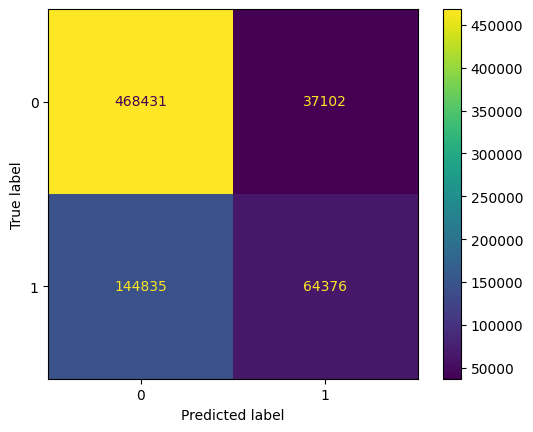

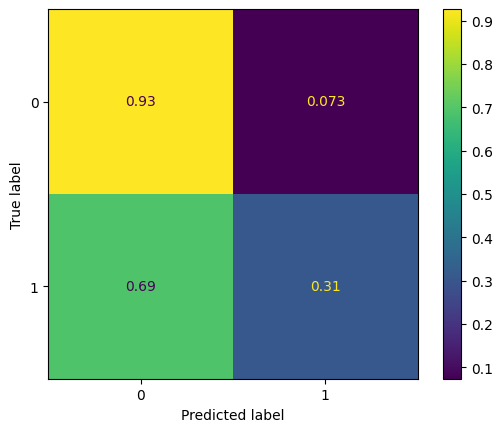

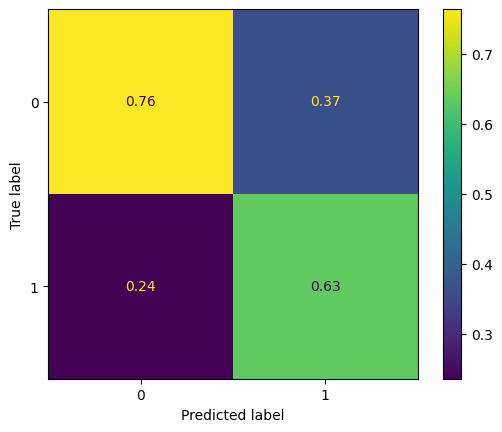

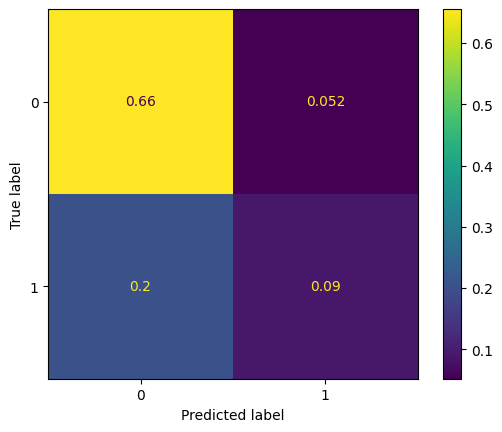

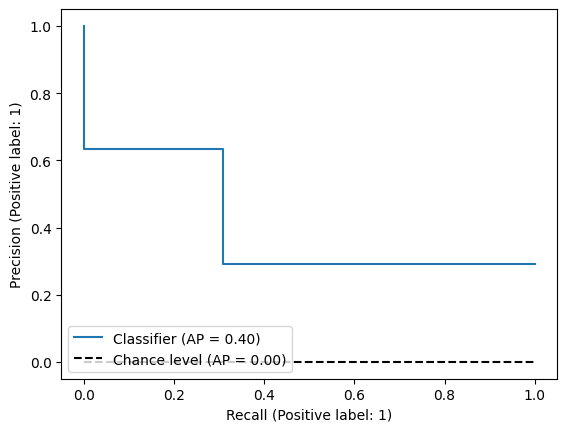

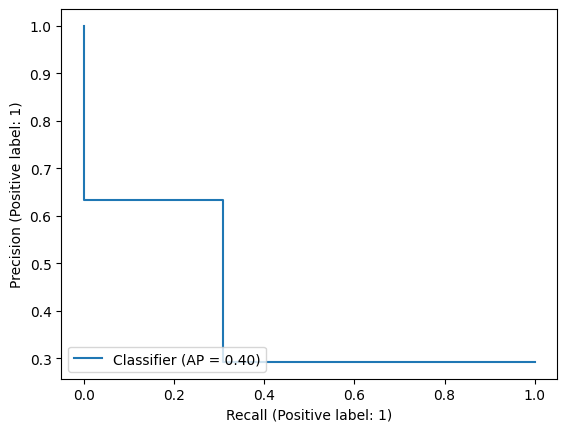

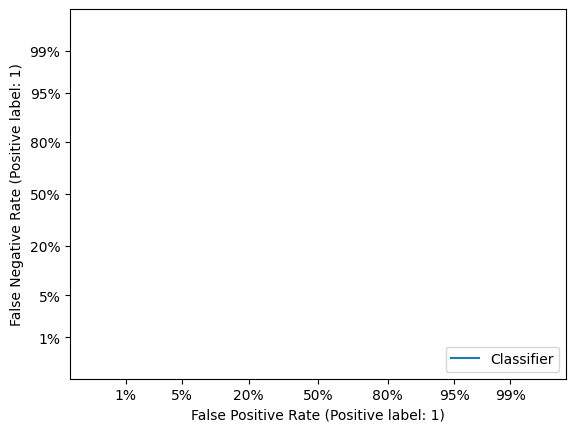

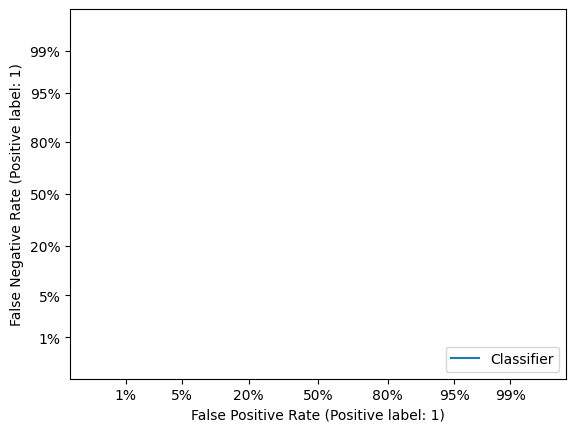

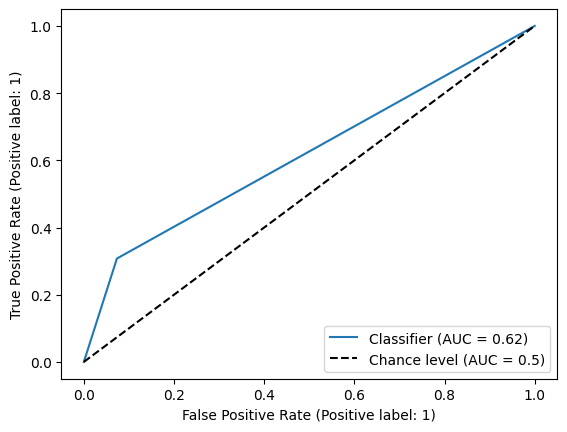

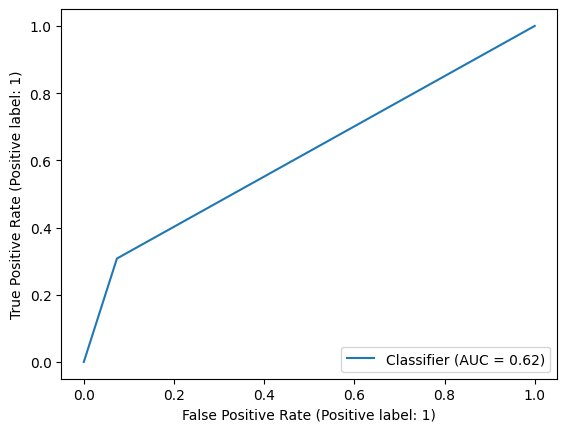



------------------------- 2/8-------------------------
under_NearMiss

All Data Stats (under_NearMiss)
   Total samples:               4649134
   Not Delayed (class 0):       2324567 ... 50.000% of total data
   Delayed (class 1):           2324567 ... 50.000% of total data

Train Data Stats (under_NearMiss)
   Total samples:               4184220
   Not Delayed (class 0):       2092110 ... 50.000% of total data
   Delayed (class 1):           2092110 ... 50.000% of total data

Val Data Stats (under_NearMiss)
   Total samples:                 46492
   Not Delayed (class 0):         23246 ... 50.000% of total data
   Delayed (class 1):             23246 ... 50.000% of total data

Test Data Stats (under_NearMiss)
   Total samples:                418422
   Not Delayed (class 0):        209211 ... 50.000% of total data
   Delayed (class 1):            209211 ... 50.000% of total data
Epoch 1/500
419/419 [==============================] - 7s 11ms/step - loss: 1.3824 - accuracy: 0.4928 - v

KeyboardInterrupt: 

In [4]:
mdl_tf1=MyModel_TF(in_shp=in_shp)
# for n in range(nRuns):
# print(f'\n\n\n\n===============================================================================================')
# print(f'===                                           {n}                                           ===')
# print(f'===============================================================================================')
for i,r in enumerate(resampleMethods):
    wt_fn=f'best_valacc_{r}.h5'
    info_hyperparam,info_layers,info_input_data,info_train_metrics,info_test_metrics,optimizer=getRunInfo()
    cb_saveBestModel=tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(datadir,'model_runs',wt_fn),
        #save_weights_only=True,
        monitor='accuracy',
        mode='max',
        save_best_only=True,
        #initial_value_threshold=0.78,
        verbose=2,
        )
    cb_reduceLR=tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=3,
        mode='auto',
        cooldown=3,
        min_lr=0.000001,
        )
    if optmzr=='adam':
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr)
    elif optmzr=='sgd':
        optimizer=tf.keras.optimizers.SGD(learning_rate=lr)
    else:
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr) #default
    del mdl_tf1
    print(f'\n\n-------------------------{i+1:2d}/{len(resampleMethods)}-------------------------')
    print(r)

    # Load Resampled X and y data
    X_res=pd.read_csv(os.path.join(datadir,f'X_res_{r}.csv'),index_col=False,dtype=dtypes_feats)
    y_res=pd.read_csv(os.path.join(datadir,f'y_res_{r}.csv'),index_col=False,dtype='uint8')
    #Use stratified train_test_split
    Xres_train,Xres_test,yres_train,yres_test=train_test_split(X_res,y_res,test_size=test_split,random_state=42,shuffle=isShuffleData,stratify=y_res)
    Xres_test,Xres_val,yres_test,yres_val=train_test_split(Xres_test,yres_test,test_size=0.1,random_state=42,stratify=yres_test)

    # Print info about data and update info dicts about data and resampling techniques being used for this run
    get_print_InputDataInfo(X_res,y_res,r,'All')
    get_print_InputDataInfo(Xres_train,yres_train,r,'Train')
    get_print_InputDataInfo(Xres_val,yres_val,r,'Val')
    get_print_InputDataInfo(Xres_test,yres_test,r,'Test')

    # Instantiate model
    mdl_tf1=MyModel_TF(in_shp=in_shp)
    mdl_tf1.compile(loss=loss_fxn,optimizer=optimizer,metrics=metrix)
    # Train model for this run
    #history1=mdl_tf1.fit(Xres_train,yres_train,epochs=epochs,batch_size=batch_size,callbacks=[cb_saveBestModel],validation_data=(Xres_val,yres_val))#,callbacks=[cb_tensorboard])
    history1=mdl_tf1.fit(Xres_train,yres_train,epochs=epochs,batch_size=batch_size,validation_data=(Xres_val,yres_val))#,callbacks=[cb_tensorboard])

    # Reload best model
    #if os.path.exists(os.path.join(datadir,wt_fn)):
        # mdl_tf1.load_model(os.path.join(datadir,wt_fn))
    #    mdl_tf1=tf.keras.models.load_model(os.path.join(datadir,'model_runs',wt_fn))


    # Update info dicts about model for this run
    layers=mdl_tf1.layers
    info_hyperparam['nLayers']=len(layers)
    info_hyperparam['model_lib']='tf'

    # Update info dicts about each layer in model for this run
    for l in range(len(layers)):
        layer=layers[l].get_config()
        # info_layer=info_layer_fmt.copy()
        # info_layer['type']=layer['name'].split('_',1)[0]
        # if l==0:
        #     info_layer['in_size']=layer['batch_input_shape'][1]
        # else:
        #     info_layer['in_size']=layers[l-1].get_config()['units']
        # info_layer['out_size']=layer['units']
        # info_layer['act_fxn']=layer['activation']
        # Save layer info in dict containing info for all layers
        info_layers[f'layer{l}_type']=layer['name'].split('_',1)[0]
        if l==0:
            info_layers[f'layer{l}_in_size']=layer['batch_input_shape'][1]
        else:
            info_layers[f'layer{l}_in_size']=layers[l-1].get_config()['units']
        info_layers[f'layer{l}_out_size']=layer['units']
        info_layers[f'layer{l}_act_fxn']=layer['activation']

    tmp=mdl_tf1.evaluate(x=Xres_test,y=yres_test)

    # Update info dict with train metrics
    info_train_metrics['bestModel_loss']=tf.get_static_value(mdl_tf1.get_metrics_result()['loss'])
    info_train_metrics['bestModel_acc']=tf.get_static_value(mdl_tf1.get_metrics_result()['accuracy'])
    info_train_metrics['history_loss']=history1.history['loss']
    info_train_metrics['history_loss_avg']=np.average(history1.history['loss'])
    info_train_metrics['history_acc']=history1.history['accuracy']
    info_train_metrics['history_acc_avg']=np.average(history1.history['accuracy'])

    # Make predictions/evaluate model
    y_pred=mdl_tf1.predict(Xres_test)
    #tmp=mdl_tf1.evaluate(x=Xres_test,y=yres_test)
    #blah=mdl_tf1.get_metrics_result()


    y_truth=yres_test
    y_preds=y_pred
    y_preds[y_preds>=0.5]=1
    y_preds[y_preds<0.5]=0



    # ANALYSIS
    #for binary classification, recall of positive class=sensitivity; recall of negative class=specificity

    # Regular Metrics https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
        # Below, there are several metrics with an `average` arg. These are the meanings:
            # None       = default, scores for each class returned
            # 'binary'   = only report results for positive class (class identified by `pos_label`)
            # 'macro'    = calculate metrics for each label, find avg unweighted mean, doesn't account for imbalance
            # 'weighted' = calculate metrics for each label, find avg weighted by support (# true instances per label), accounts for label imbal, can result in F1 not between precision and recall
            # 'samples'  = calc metrics for each instance, find avg (only meaningful for multilabel classifier where this differs from accuracy_score)
        # There are also several metrics with `zero_division` arg
            # When TP+FP=0, precision is undefined
            # when TP+FN=0, recall is undefined
            # Options for how to handle it:
                # 'warn' = default, raises warning and sets to 0
                # 0.0 = does not warn, sets to 0
                # 1.0 = does not warn, sets to 1
                # np.nan = sets to np.nan, does not warn, values excluded from aveerages

        # Set options
    div0=np.nan
    lbls=[0,1]
    lbl_names=['OnTime','Delayed']


    # Accuracy
    #acc=accuracy_score(y_truth,y_preds)
    #info_test_metrics['accuracy_test']=accuracy_score(y_truth,y_preds)

    # Balanced Accuracy
        # Although somoe definitions of balanced accuracy vary among literature, this library defines it as equivalent to accuracy_score with class-balanced sample weights and desirable properties for binary cases
        # Avg of recall obtained on each class
        # deals with imbalaned datasets
        # 1=best, 0=worst when `adjusted=False`
    #bal_acc1=balanced_accuracy_score(y_truth,y_preds,adjusted=False) #default
    #bal_acc2=balanced_accuracy_score(y_truth,y_preds,adjusted=True)
    info_test_metrics['accuracy_adjF_imbal']=balanced_accuracy_score(y_truth,y_preds,adjusted=False) #default
    info_test_metrics['accuracy_adjT_imbal']=balanced_accuracy_score(y_truth,y_preds,adjusted=True)
        # adjusted=True --> result is adjusted for chance so that random performance score=0 while keeping perfect performance score=1

    # Precision
        # tp/(tp+fp)=precision of positive class
        # ability of classifier not to lbl neg sample as pos
        # best=1, worst=0

    # Recall
        # tp/(tp+fn)
        # ability of classifier to find all positive samples
        # best=1, worst=0


    # F1 Score (aka F-score or F-measure)
        # harmonic mean b/t precision and recall
        # 1=best, worst=0
        # Relative contribution of precision and recall are equal for F1
        # F1 = 2*(precision*recall) / (precision+recall) = F1 of positive class in binary classification
        # When TP+FP==0, precision undefined. When TP+FN==0, recall undefined

    #Precision, Recall, F-measure (F-beta), and Support for each class
    prfs_avgNon=precision_recall_fscore_support(y_truth,y_preds,labels=lbls,pos_label=1,average=None,zero_division=div0)
    prfs_avgMac=precision_recall_fscore_support(y_truth,y_preds,labels=lbls,pos_label=1,average='macro',zero_division=div0)
    prfs_avgWtd=precision_recall_fscore_support(y_truth,y_preds,labels=lbls,pos_label=1,average='weighted',zero_division=div0)
    info_test_metrics['support_0_prfs']=prfs_avgNon[3][0]
    info_test_metrics['support_1_prfs']=prfs_avgNon[3][1]
    info_test_metrics['precision_0_prfs']=prfs_avgNon[0][0]
    info_test_metrics['precision_1_prfs']=prfs_avgNon[0][1]
    info_test_metrics['precision_avgMacro_prfs']=prfs_avgMac[0]
    info_test_metrics['precision_avgWeighted_prfs']=prfs_avgWtd[0]
    info_test_metrics['recall_0_prfs']=prfs_avgNon[1][0]
    info_test_metrics['recall_1_prfs']=prfs_avgNon[1][1]
    info_test_metrics['recall_avgMacro_prfs']=prfs_avgMac[1]
    info_test_metrics['recall_avgWeighted_prfs']=prfs_avgWtd[1]
    info_test_metrics['f1_0_prfs']=prfs_avgNon[2][0]
    info_test_metrics['f1_1_prfs']=prfs_avgNon[2][1]
    info_test_metrics['f1_avgMacro_prfs']=prfs_avgMac[2]
    info_test_metrics['f1_avgWeighted_prfs']=prfs_avgWtd[2] #57
    #Precision=tp/(tp+fp), ability of classifier not to label a negative sample as positive.
    #Recall=tp/(tp+fn), ability of classifier to find all positive samples.
    #F-beta score = weighted harmonic mean of precision and recall, best score=1, worst score=0.
    #   Weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.
    #Support=# of occurrences of each class in y_true
    #If pos_label=None and binary classification, fxn returns avg precision, recall and F-measure if `average`` in {'micro','macro','weighted','samples'}

    # Confusion Matrix
    cm_normN=                           confusion_matrix(y_truth,y_preds,normalize=None)           #not normalized, default
    tn_normN,fp_normN,fn_normN,tp_normN=confusion_matrix(y_truth,y_preds,normalize=None).ravel()   #not normalized, default
    cm_normT=                           confusion_matrix(y_truth,y_preds,normalize='true')         #normalized=true (normalized over true (rows) conditions)
    tn_normT,fp_normT,fn_normT,tp_normT=confusion_matrix(y_truth,y_preds,normalize='true').ravel() #normalized=true (normalized over true (rows) conditions)
    cm_normP=                           confusion_matrix(y_truth,y_preds,normalize='pred')         #normalized=pred (normalized over predicted (cols) conditions)
    tn_normP,fp_normP,fn_normP,tp_normP=confusion_matrix(y_truth,y_preds,normalize='pred').ravel() #normalized=pred (normalized over predicted (cols) conditions)
    cm_normA=                           confusion_matrix(y_truth,y_preds,normalize='all')          #normalized=all (normalized over all the population
    tn_normA,fp_normA,fn_normA,tp_normA=confusion_matrix(y_truth,y_preds,normalize='all').ravel()  #normalized=all (normalized over all the population
    info_test_metrics['TP_normNone']=tp_normN
    info_test_metrics['TP_normTrue']=tp_normT
    info_test_metrics['TP_normPred']=tp_normP
    info_test_metrics['TP_normAll'] =tp_normA
    info_test_metrics['TN_normNone']=tn_normN
    info_test_metrics['TN_normTrue']=tn_normT
    info_test_metrics['TN_normPred']=tn_normP
    info_test_metrics['TN_normAll'] =tn_normA
    info_test_metrics['FP_normNone']=fp_normN
    info_test_metrics['FP_normTrue']=fp_normT
    info_test_metrics['FP_normPred']=fp_normP
    info_test_metrics['FP_normAll'] =fp_normA
    info_test_metrics['FN_normNone']=fn_normN
    info_test_metrics['FN_normTrue']=fn_normT
    info_test_metrics['FN_normPred']=fn_normP
    info_test_metrics['FN_normAll'] =fn_normA #37
    # Plot confusion matrix
    disp=ConfusionMatrixDisplay(confusion_matrix=cm_normN)
    disp.plot()
    plt.savefig(fname=os.path.join(datadir,'figs',f'ConfusionMatrix_normNone_{r}.png'))
    plt.show()
    disp=ConfusionMatrixDisplay(confusion_matrix=cm_normT)
    disp.plot()
    plt.savefig(fname=os.path.join(datadir,'figs',f'ConfusionMatrix_normTrue_{r}.png'))
    plt.show()
    disp=ConfusionMatrixDisplay(confusion_matrix=cm_normP)
    disp.plot()
    plt.savefig(fname=os.path.join(datadir,'figs',f'ConfusionMatrix_normPred_{r}.png'))
    plt.show()
    disp=ConfusionMatrixDisplay(confusion_matrix=cm_normA)
    disp.plot()
    plt.savefig(fname=os.path.join(datadir,'figs',f'ConfusionMatrix_normAll_{r}.png'))
    plt.show()



    # Class Likelihood Ratios
        # computes binary classification pos and neg likelihood ratios
        # Positive likelihood ratio: LR+ =    sensitivity   / (1-specificity)
        # Negative likelihood ratio: LR- = (1-sensitivity)  /    specificity
                # sensitivity = recall = TP/(TP+FN)
                # specificity =          TN/(TN+FP)
            # both can be used to obtain post-test probabilities given pre-test probability
    class_likelihood=class_likelihood_ratios(y_truth,y_preds,raise_warning=False,labels=lbls) #measure classificaton performance
    info_test_metrics['class_likelihood_ratio_0']=class_likelihood[0]
    info_test_metrics['class_likelihood_ratio_1']=class_likelihood[1]
        # Positive likelihood ratio
            # range 1->inf
            # LR+ = 1 --> probability of predicting positive class is same for samples belonging to either class == TEST IS USELESS
            # greater LR+ --> more a pos predicition is likely to be TP when compared to pre-test probabilities
            # LR+ <1 --> invalid, indicates that odds of sample being TP decrease wrt pre-test odds
        # Negative likelihood ratio:
            # range 0->1
            # LR- closer to 0 --> lower the probability of given sample to be FN
            # LR-=1 --> TEST IS USELESS b/c odds of having condition did not change after test
            # LR- >1 --> invalidates classifier, indicates increase in odds of sample belonging to + class after being classified as neg, happens when classifieer systematically predicts opposite of true label

    # Classification Report
        # Reported avgs:
            # macro avg    = avging unweighted mean per lbl
            # weighted avg = avging support-weighted mean per lbl
            # sample avg   = only for multilabel classification
            # Micro avg (avging total TPs, FNs and FPs) only shown for multi-label or multi-class with a subset of classes, b/c it corresponds to accuracy otherwise and would be same for all metrics.
        # For binary classifier
            # sensitivity=recall of positive class
            # specificity=recall of negative class

    # Displays/plots
    # Precision Recall
    disp=PrecisionRecallDisplay.from_predictions(y_truth,y_preds,pos_label=1,drop_intermediate=False,plot_chance_level=True)
            #drop_intermediate (True or False(default)) = whether to drop suboptimal thresholds which wouldn't appear on plotted curve
            #name=label for curve. None='Classifier'
            #plot_chance_level (True, False(default)) = prevalence of pos lbl computed from data passed during from_preds call
    disp.plot()
    plt.savefig(fname=os.path.join(datadir,'figs',f'PrecRecall_{r}.png'))
    plt.show()

    # DET Curve
    disp=DetCurveDisplay.from_predictions(y_truth,y_preds,pos_label=1)
        # computs error rates for different probability thresholds
        # metric used for evaluating ranking and error tradeoffs of binary classification task
    disp.plot()
    plt.savefig(fname=os.path.join(datadir,'figs',f'DETcurve_{r}.png'))
    plt.show()

    # ROC Curve
    disp=RocCurveDisplay.from_predictions(y_truth,y_preds,pos_label=1,drop_intermediate=False,plot_chance_level=True)
        # ROC = Receiver Operating Characteristic
        # illustrates performance of binary classifier system as its sidcrimination threshold is varied
        # created by plotting TRP vs FPR at various threshold settings
            # TPR aka sensitivity = TP/all positives
            # FPR = 1-specificity = 1-true negative rate(TNR) = FP/all negatives
        # doesn't require optimizing threshold for each label
        # top left corner is ideal (FPR=0, TPR=1), not realistic, but means that AUC (area under curve) is larger=better
        # steepness of ROC curve is important, ideal to maximize TPR while minimizing FPR
    disp.plot()
    plt.savefig(fname=os.path.join(datadir,'figs',f'ROCcurve_{r}.png'))
    plt.show()
        # example with cross val and auc: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py


    #Imabalnced metrics https://imbalanced-learn.org/stable/references/metrics.html
    #Precision, Recall, Specificity, Geometric Mean, Index Balanced Accuracy of Geometric Mean
    # class_report_imbal=classification_report_imbalanced(y_truth,y_preds,labels=lbls,target_names=lbl_names,output_dict=True,zero_division='warn')
    # info_test_metrics[  'precision_0_rprt_imbal']=class_report_imbal['OnTime']['pre']
    # info_test_metrics[     'recall_0_rprt_imbal']=class_report_imbal['OnTime']['rec']
    # info_test_metrics['specificity_0_rprt_imbal']=class_report_imbal['OnTime']['spe']
    # info_test_metrics[         'f1_0_rprt_imbal']=class_report_imbal['OnTime']['f1']
    # info_test_metrics[    'geoMean_0_rprt_imbal']=class_report_imbal['OnTime']['geo']
    # info_test_metrics[        'iba_0_rprt_imbal']=class_report_imbal['OnTime']['iba']
    # info_test_metrics[    'support_0_rprt_imbal']=class_report_imbal['OnTime']['sup']
    # info_test_metrics[  'precision_1_rprt_imbal']=class_report_imbal['Delayed']['pre']
    # info_test_metrics[     'recall_1_rprt_imbal']=class_report_imbal['Delayed']['rec']
    # info_test_metrics['specificity_1_rprt_imbal']=class_report_imbal['Delayed']['spe']
    # info_test_metrics[         'f1_1_rprt_imbal']=class_report_imbal['Delayed']['f1']
    # info_test_metrics[    'geoMean_1_rprt_imbal']=class_report_imbal['Delayed']['geo']
    # info_test_metrics[        'iba_1_rprt_imbal']=class_report_imbal['Delayed']['iba']
    # info_test_metrics[    'support_1_rprt_imbal']=class_report_imbal['Delayed']['sup']
    # info_test_metrics[  'precision_avg_rprt_imbal']=class_report_imbal['avg_pre']
    # info_test_metrics[     'recall_avg_rprt_imbal']=class_report_imbal['avg_rec']
    # info_test_metrics['specificity_avg_rprt_imbal']=class_report_imbal['avg_spe']
    # info_test_metrics[         'f1_avg_rprt_imbal']=class_report_imbal['avg_f1']
    # info_test_metrics[    'geoMean_avg_rprt_imbal']=class_report_imbal['avg_geo']
    # info_test_metrics[        'iba_avg_rprt_imbal']=class_report_imbal['avg_iba']
    # info_test_metrics[    'support_tot_rprt_imbal']=class_report_imbal['total_support'] #97
    # alpha=weighting factor, default=0.1

    #sensitivity, specificity, and support for each class
    #support=# of occurrences of each class in yres_test (truths)
    # Sensitivity Score (1=best, 0=worst)
    #sensitivity=TP/(TP+FN), quantifies ability to avoid FNs
    # Specificity Score (1=best, 0=worst)
    #specificity=TN/(TN+FP), quantifies ability to avoid FPs
    sens_spec_sup_avgNon=sensitivity_specificity_support(y_truth,y_preds,labels=lbls,pos_label=1,average=None)
    sens_spec_sup_avgMac=sensitivity_specificity_support(y_truth,y_preds,labels=lbls,pos_label=1,average='macro')
    sens_spec_sup_avgWtd=sensitivity_specificity_support(y_truth,y_preds,labels=lbls,pos_label=1,average='weighted')
    info_test_metrics['support_0_sss_imbal']=sens_spec_sup_avgNon[2][0]
    info_test_metrics['support_1_sss_imbal']=sens_spec_sup_avgNon[2][1]
    info_test_metrics['sensitivity_0_sss_imbal']=sens_spec_sup_avgNon[0][0]
    info_test_metrics['sensitivity_1_sss_imbal']=sens_spec_sup_avgNon[0][1]
    info_test_metrics['sensitivity_avgMacro_sss_imbal']=sens_spec_sup_avgMac[0]
    info_test_metrics['sensitivity_avgWeighted_sss_imbal']=sens_spec_sup_avgWtd[0]
    info_test_metrics['specificity_0_sss_imbal']=sens_spec_sup_avgNon[1][0]
    info_test_metrics['specificity_1_sss_imbal']=sens_spec_sup_avgNon[1][1]
    info_test_metrics['specificity_avgMacro_sss_imbal']=sens_spec_sup_avgMac[1]
    info_test_metrics['specificity_avgWeighted_sss_imbal']=sens_spec_sup_avgWtd[1] #111



    # Geometric Mean Score (best=1, worst=0)
    geoMean_avgNon=geoMean(y_truth,y_preds,labels=lbls,pos_label=1,average=None)
    # geoMean_avgBin=geoMean(y_truth,y_preds,labels=lbls,pos_label=1,average='binary')
    # geoMean_avgMic=geoMean(y_truth,y_preds,labels=lbls,pos_label=1,average='micro')
    # geoMean_avgMac=geoMean(y_truth,y_preds,labels=lbls,pos_label=1,average='macro')
    # geoMean_avgWtd=geoMean(y_truth,y_preds,labels=lbls,pos_label=1,average='weighted')
    info_test_metrics['geoMean_0_imbal']=geoMean_avgNon[0]
    info_test_metrics['geoMean_1_imbal']=geoMean_avgNon[1]
    # info_test_metrics['geoMean_avgBinary_imbal']=geoMean_avgBin
    # info_test_metrics['geoMean_avgMicro_imbal']=geoMean_avgMic
    # info_test_metrics['geoMean_avgMacro_imbal']=geoMean_avgMac
    # info_test_metrics['geoMean_avgWeighted_imbal']=geoMean_avgWtd
    #g-mean=root of product of class-wise sensitivity
    # tries to maximize accuracy on each class while keeping accuracies balanced
    # for binclass, g-mean=sqrt of product of sensitivity and specificity

    # Macro-Avged MAE (mean absolute error)
    #macro_avg_mae=macro_avg_mae(y_truth,y_preds)
    info_test_metrics['macro_avg_mae_imbal']=macro_avg_mae(y_truth,y_preds) #130
    #calcs MAE for each class, avgs them, giving equal wt to each class, best = 0.0

    #Index balanced accuracy- concert any metric to be used in imbalanced leaerning problem
    #https://imbalanced-learn.org/stable/auto_examples/evaluation/plot_metrics.html#sphx-glr-auto-examples-evaluation-plot-metrics-py
    iba_a01_sqT=iba(alpha=0.1,squared=True)(geoMean)
    IBA_a01_sqT=iba_a01_sqT(y_truth,y_preds,average=None)
    iba_a01_sqF=iba(alpha=0.1,squared=False)(geoMean)
    IBA_a01_sqF=iba_a01_sqF(y_truth,y_preds,average=None)
    iba_a05_sqT=iba(alpha=0.5,squared=True)(geoMean)
    IBA_a05_sqT=iba_a05_sqT(y_truth,y_preds,average=None)
    iba_a05_sqF=iba(alpha=0.5,squared=False)(geoMean)
    IBA_a05_sqF=iba_a05_sqT(y_truth,y_preds,average=None)
    info_test_metrics['iba_a01_sqT_imbal_0']=IBA_a01_sqT[0]
    info_test_metrics['iba_a01_sqT_imbal_1']=IBA_a01_sqT[1]
    info_test_metrics['iba_a01_sqF_imbal_0']=IBA_a01_sqF[0]
    info_test_metrics['iba_a01_sqF_imbal_1']=IBA_a01_sqF[1]
    info_test_metrics['iba_a05_sqT_imbal_0']=IBA_a05_sqT[0]
    info_test_metrics['iba_a05_sqT_imbal_1']=IBA_a05_sqT[1]
    info_test_metrics['iba_a05_sqF_imbal_0']=IBA_a05_sqF[0] #134
    info_test_metrics['iba_a05_sqF_imbal_1']=IBA_a05_sqF[1] #134
    #balance any scoring fxn using iba
    #factory fxn wraps scoring fxn to express as iba
    #need to use fxn to decorate any scoring fxn


    info_all=pd.concat([pd.DataFrame([info_hyperparam],index=[0]),
                        pd.DataFrame([info_layers],index=[0]),
                        pd.DataFrame([info_input_data],index=[0]),
                        pd.DataFrame([info_train_metrics],index=[0]),
                        pd.DataFrame([info_test_metrics],index=[0]),
                        ], axis=1)


    info_all.to_csv(os.path.join(datadir,'model_runs','run_info.csv'),mode='a',index=False,header=True,na_rep=np.nan)


In [1]:
import tensorflow as tf
print(tf.version.VERSION)

2023-07-26 13:23:42.978200: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0
